<a href="https://colab.research.google.com/github/manushi0304/Diabetic-Retinopathy-Detection/blob/main/NASNetMobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
subhajeetdas_aptos_2019_jpg_path = kagglehub.dataset_download('subhajeetdas/aptos-2019-jpg')

print('Data source import complete.')

100%|██████████| 2.82G/2.82G [00:33<00:00, 90.6MB/s]

Extracting files...


Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from tqdm import tqdm
import random
import shutil
import seaborn as sns
import warnings
from PIL import Image
import numpy as np
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , class_likelihood_ratios
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization, Add
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
#---------------------------------------
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger


In [ ]:
def train_dff(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    binary_classes = ['0' if label == '0' else '1' for label in classes]
    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': binary_classes})
    return tr_df

def test_dff(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    binary_classes = ['0' if label == '0' else '1' for label in classes]
    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': binary_classes})
    return ts_df

In [ ]:
import os
print("Dataset downloaded to:", subhajeetdas_aptos_2019_jpg_path)
print("Contents:", os.listdir(subhajeetdas_aptos_2019_jpg_path))


Dataset downloaded to: /root/.cache/kagglehub/datasets/subhajeetdas/aptos-2019-jpg/versions/12
Contents: ['APTOS 2019 (Original) (Binary)']


In [ ]:
def data_df(train_path,test_path):
    train_df = train_dff(train_path)
    test_df = test_dff(test_path)
    valid_df, test_df = train_test_split(test_df, train_size=0.5, random_state=41, stratify=test_df['Class'])

    datasets = [("Train Data", train_df['Class']), ("Test Data", test_df['Class']),("Validation Data", valid_df['Class'])]
    palettes = ['crest', 'mako', 'rocket', 'flare']

# Loop through each dataset and create the corresponding plot
    for i, (title, data) in enumerate(datasets):
        plt.figure(figsize=(4, 3))
        ax = sns.countplot(y=data, palette=palettes[i % len(palettes)])
        ax.set(xlabel='', ylabel='', title=f'Count of images in each class ({title})')
        ax.bar_label(ax.containers[0], fontsize=10, padding=5)
        plt.show()
    return train_df,test_df

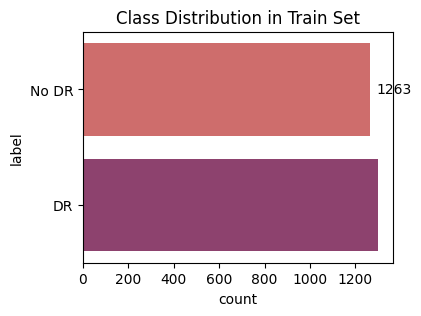

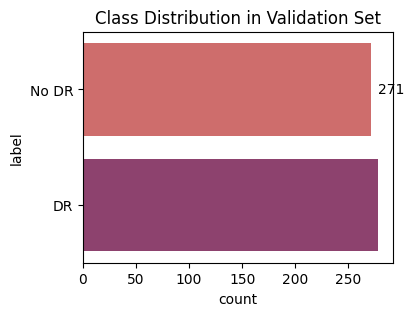

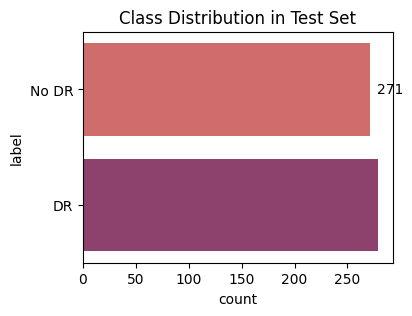

Number of classes: 2


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Base path with binary folders 'DR' and 'No DR'
# Corrected base_path based on the output of cell x4BVVV0fvJ4T
base_path = "/root/.cache/kagglehub/datasets/subhajeetdas/aptos-2019-jpg/versions/12/APTOS 2019 (Original) (Binary)"
# Collect all image paths and their labels
image_paths = []
labels = []

# Iterate through the actual class directories found in the base_path
for class_name in os.listdir(base_path):
    class_dir = os.path.join(base_path, class_name)
    if os.path.isdir(class_dir): # Ensure it's a directory
        # Assuming 'DR' corresponds to label 1 and 'No DR' to label 0
        # The actual class names are 'DR' and 'No DR' based on cell iEW6uEXfwfSH output
        label = 1 if class_name == 'DR' else 0
        for img_file in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_file))
            labels.append(label)

# Create DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Split the data - Modified to use single train/validation/test split
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# Plot class distribution
datasets = [("Train", train_df), ("Validation", valid_df), ("Test", test_df)]
for name, data in datasets:
    plt.figure(figsize=(4, 3))
    ax = sns.countplot(y=data['label'], palette='flare')
    ax.set_title(f"Class Distribution in {name} Set")
    # Set tick labels based on the actual class names
    ax.set_yticklabels(['No DR', 'DR'])
    ax.bar_label(ax.containers[0], fontsize=10, padding=5)
    plt.show()

# Print number of classes
y = df['label'].nunique()
print(f"Number of classes: {y}")

In [ ]:
import os

# Use the correct base_path as determined in cell G2y7JDhDwZpJ
base_path = "/root/.cache/kagglehub/datasets/subhajeetdas/aptos-2019-jpg/versions/12/APTOS 2019 (Original) (Binary)"

print("Contents of base_path:")
print(os.listdir(base_path))

Contents of base_path:
['Details.txt', 'DR', 'No DR']


In [ ]:
def create_model(img_shape, base_model_function, num_classes):
    from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adamax
    from tensorflow.keras.metrics import Precision, Recall

    inputs = Input(shape=img_shape)
    base_model = base_model_function(
        include_top=False,
        weights="imagenet",
        input_shape=img_shape,
        pooling='max'
    )
    x = base_model(inputs, training=False)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    residual_input = x
    x = Dense(256, activation='relu')(x)
    x = Add()([x, residual_input])
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    if num_classes == 1:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    else:
        activation = 'softmax'
        loss = 'categorical_crossentropy'

    outputs = Dense(num_classes, activation=activation)(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adamax(learning_rate=0.0005),
        loss=loss,
        metrics=['accuracy', Precision(name='precision_8'), Recall(name='recall_8')]
    )
    model.summary()
    return model


In [ ]:
def plot_training_metrics(epochs, training_metrics, validation_metrics, title, xlabel, ylabel, best_index, best_value, best_label):
    """
    Plots training and validation metrics over epochs with an emphasis on the best value.
    """
    if len(training_metrics) == 0 or len(validation_metrics) == 0:
        print("Error: Training or validation metrics are empty.")
        return

    # Create the plot
    plt.figure(figsize=(12, 6))  # Larger figure for more space
    plt.plot(epochs, training_metrics, 'r-', label='Training', linewidth=2, markersize=6)
    plt.plot(epochs, validation_metrics, 'g-', label='Validation', linewidth=2, markersize=6)

    # Add a scatter for the best value
    plt.scatter(best_index + 1, best_value, s=200, c='blue', edgecolor='black', label=f'{best_label} ({best_value:.4f})', zorder=5)

    # Annotate the best value point
    plt.text(best_index + 1, best_value + 0.005, f'{best_value:.4f}', color='blue', ha='center', fontsize=12, fontweight='bold')

    # Add horizontal line at best value to emphasize it
    plt.axhline(y=best_value, color='blue', linestyle='--', linewidth=1.5, alpha=0.6)

    # Title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Enhance legend
    plt.legend(fontsize=12, loc='best', title="Metrics", title_fontsize=14)

    # Grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

    # Customize ticks for better clarity
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Tight layout to avoid clipping
    plt.tight_layout()

    # Show the plot
    plt.show()


def plot_all_models_comparison(all_histories):
    """
    Plot comparison of all models' training progress
    """
    if not all_histories:
        return

    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 8))

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

    # Plot validation accuracy for all models
    for i, (model_name, history) in enumerate(all_histories.items()):
        epochs = np.arange(1, len(history['val_accuracy']) + 1)
        ax1.plot(epochs, history['val_accuracy'],
                color=colors[i % len(colors)],
                label=f'{model_name}',
                linewidth=2,
                marker='o',
                markersize=4)

    ax1.set_title('Validation Accuracy Comparison - All Models', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Epochs', fontsize=14)
    ax1.set_ylabel('Validation Accuracy', fontsize=14)
    ax1.legend(fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Plot validation loss for all models
    for i, (model_name, history) in enumerate(all_histories.items()):
        epochs = np.arange(1, len(history['val_loss']) + 1)
        ax2.plot(epochs, history['val_loss'],
                color=colors[i % len(colors)],
                label=f'{model_name}',
                linewidth=2,
                marker='o',
                markersize=4)

    ax2.set_title('Validation Loss Comparison - All Models', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Epochs', fontsize=14)
    ax2.set_ylabel('Validation Loss', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_confusion_matrix(y_true, y_pred_classes, test_gen):
    """
    Plots a confusion matrix and displays evaluation metrics.

    Parameters:
        y_true (list or array-like): True labels.
        y_pred_classes (list or array-like): Predicted labels.
        test_gen (object): Test data generator, used to extract class labels.
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Set a larger figure size and create an axis
    fig, ax = plt.subplots(figsize=(12, 10))  # Adjust dimensions as needed

    # Plot the confusion matrix on the specified axis
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices.keys())
    disp.plot(cmap='Blues', ax=ax)  # Assign ax to ensure resizing

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='micro')
    recall = recall_score(y_true, y_pred_classes, average='micro')
    f1 = f1_score(y_true, y_pred_classes, average='micro')

    # Customize plot title and display metrics below the plot
    plt.title("Confusion Matrix", fontsize=16)
    plt.figtext(
        0.5, -0.1,
        f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}",
        ha="center", fontsize=14, color="black"
    )

    # Show the plot with the updated size
    plt.show()

In [ ]:
def confusion(y_true, y_pred_classes):
    """
    Computes binary classification evaluation metrics based on confusion matrix.
    Includes sensitivity, specificity, FPR, FNR, and likelihood ratios.
    """
    cm = confusion_matrix(y_true, y_pred_classes)

    if cm.shape == (2, 2):  # Only compute for binary classification
        tn, fp, fn, tp = cm.ravel()

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall for class 1
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Recall for class 0

        # New: False Positive Rate and False Negative Rate
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

        # Likelihood Ratios
        lr_positive = sensitivity / (1 - specificity) if (1 - specificity) > 0 else float('inf')
        lr_negative = (1 - sensitivity) / specificity if specificity > 0 else float('inf')

        print(f"Sensitivity (Recall): {sensitivity:.4f}")
        print(f"Specificity        : {specificity:.4f}")
        print(f"False Positive Rate: {fpr:.4f}")
        print(f"False Negative Rate: {fnr:.4f}")
        print(f"Likelihood Ratio + : {lr_positive:.4f}")
        print(f"Likelihood Ratio - : {lr_negative:.4f}")
    else:
        print("Skipping advanced metrics: not a binary classification problem.")


In [ ]:
# Removed KFold - using single train/validation split
img_size = (256, 256)
img_shape = (256,256,3)
batch_size = 32
loss_threshold=1.5
patience=10
epoch_size = 30

In [ ]:
class CSVMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_generator, model_name, csv_path):
        self.validation_generator = validation_generator
        self.model_name = model_name
        self.csv_path = csv_path
        self.precision = []
        self.recall = []
        self.f1 = []
        self.init_csv()

    def init_csv(self):
        headers = [
            'timestamp', 'model_name', 'epoch', 'train_loss', 'train_accuracy',
            'train_precision', 'train_recall', 'val_loss', 'val_accuracy',
            'val_precision', 'val_recall', 'val_f1', 'val_sensitivity',
            'val_specificity', 'val_fpr', 'val_fnr', 'learning_rate'
        ]
        with open(self.csv_path, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(headers)

    def on_epoch_end(self, epoch, logs=None):
        val_pred = self.model.predict(self.validation_generator, verbose=0)
        val_pred_classes = np.argmax(val_pred, axis=1)
        val_true = self.validation_generator.classes

        val_precision = precision_score(val_true, val_pred_classes, average='macro', zero_division=0)
        val_recall = recall_score(val_true, val_pred_classes, average='macro', zero_division=0)
        val_f1 = f1_score(val_true, val_pred_classes, average='macro', zero_division=0)

        cm = confusion_matrix(val_true, val_pred_classes)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
            fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        else:
            sensitivity, specificity, fpr, fnr = 0, 0, 0, 0

        self.precision.append(val_precision)
        self.recall.append(val_recall)
        self.f1.append(val_f1)

        current_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))

        row_data = [
            datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            self.model_name,
            epoch + 1,
            logs.get('loss', 0),
            logs.get('accuracy', 0),
            logs.get('precision_8', 0),
            logs.get('recall_8', 0),
            logs.get('val_loss', 0),
            logs.get('val_accuracy', 0),
            logs.get('val_precision_8', 0),
            logs.get('val_recall_8', 0),
            val_f1,
            sensitivity,
            specificity,
            fpr,
            fnr,
            current_lr
        ]

        with open(self.csv_path, 'a', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(row_data)


In [ ]:
def automated_model_training_with_csv_logging(train_df, valid_df, test_df, img_size, batch_size, img_shape, model_list, epoch_size, y, csv_output_path=None):
    import os
    import csv
    import numpy as np
    from datetime import datetime
    import tensorflow as tf
    from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    import matplotlib.pyplot as plt

    def get_latest_checkpoint(checkpoint_dir):
        latest_checkpoint = os.path.join(checkpoint_dir, "latest_model.keras")
        if os.path.exists(latest_checkpoint):
            log_path = os.path.join(checkpoint_dir, "training_log.csv")
            if os.path.exists(log_path):
                with open(log_path, 'r', encoding='utf-8') as f:
                    reader = csv.DictReader(f)
                    last_epoch = 0
                    for row in reader:
                        try:
                            last_epoch = int(row['epoch'])
                        except (ValueError, KeyError):
                            continue
                    return latest_checkpoint, last_epoch
        return None, 0

    if csv_output_path is None:
        csv_output_path = '/content/drive/MyDrive/DiabeticProject/training_logs'
    os.makedirs(csv_output_path, exist_ok=True)

    save_path = '/content/drive/MyDrive/DiabeticProject/saved_models'
    os.makedirs(save_path, exist_ok=True)

    master_csv_path = os.path.join(csv_output_path, 'all_models_training_log.csv')
    all_histories = {}

    for model_fn in model_list:
        print(f"\nTraining with model: {model_fn.__name__}")

        individual_csv_path = os.path.join(csv_output_path, f'{model_fn.__name__}_training_log.csv')

        train_df['label'] = train_df['label'].astype(str)
        valid_df['label'] = valid_df['label'].astype(str)
        test_df['label'] = test_df['label'].astype(str)

        train_gen = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2)).flow_from_dataframe(
            train_df, x_col='image_path', y_col='label', batch_size=batch_size, target_size=img_size, class_mode='categorical')

        valid_gen = ImageDataGenerator(rescale=1/255).flow_from_dataframe(
            valid_df, x_col='image_path', y_col='label', batch_size=batch_size, target_size=img_size, class_mode='categorical')

        test_gen = ImageDataGenerator(rescale=1/255).flow_from_dataframe(
            test_df, x_col='image_path', y_col='label', batch_size=16, target_size=img_size, shuffle=False, class_mode='categorical')

        model_id = f"{model_fn.__name__}_single"
        checkpoint_dir = os.path.join(save_path, model_id)
        os.makedirs(checkpoint_dir, exist_ok=True)

        model = create_model(img_shape, model_fn, y)

        latest_checkpoint = os.path.join(checkpoint_dir, "latest_model.keras")
        initial_epoch = 0
        previous_history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}

        if os.path.exists(latest_checkpoint):
            print(f"Resuming training from: {latest_checkpoint}")
            model.load_weights(latest_checkpoint)
            csv_log_path = os.path.join(checkpoint_dir, "training_log.csv")
            if os.path.exists(csv_log_path):
                with open(csv_log_path, 'r') as f:
                    reader = csv.DictReader(f)
                    for row in reader:
                        try:
                            epoch_num = int(row['epoch'])
                            if 'accuracy' in row:
                                previous_history['accuracy'].append(float(row['accuracy']))
                            if 'val_accuracy' in row:
                                previous_history['val_accuracy'].append(float(row['val_accuracy']))
                            if 'loss' in row:
                                previous_history['loss'].append(float(row['loss']))
                            if 'val_loss' in row:
                                previous_history['val_loss'].append(float(row['val_loss']))
                            initial_epoch = epoch_num + 1
                        except (ValueError, KeyError):
                            continue
        else:
            print("No checkpoint found. Starting from scratch.")

        checkpoint_cb = ModelCheckpoint(
            filepath=os.path.join(checkpoint_dir, "latest_model.keras"),
            save_best_only=False,
            save_weights_only=False,
            verbose=1
        )
        csv_logger = CSVLogger(os.path.join(checkpoint_dir, "training_log.csv"), append=True)

        callbacks = [checkpoint_cb, csv_logger]
        if 'CSVMetricsCallback' in globals():
            callbacks.append(CSVMetricsCallback(valid_gen, model_fn.__name__, individual_csv_path))
            callbacks.append(CSVMetricsCallback(valid_gen, model_fn.__name__, master_csv_path))

        history = model.fit(
            train_gen,
            validation_data=valid_gen,
            epochs=epoch_size,
            shuffle=False,
            initial_epoch=initial_epoch,
            callbacks=callbacks
        )

        combined_history = {
            'accuracy': previous_history['accuracy'] + history.history['accuracy'],
            'val_accuracy': previous_history['val_accuracy'] + history.history['val_accuracy'],
            'loss': previous_history['loss'] + history.history['loss'],
            'val_loss': previous_history['val_loss'] + history.history['val_loss']
        }

        all_histories[model_fn.__name__] = combined_history

        total_epochs = len(combined_history['accuracy'])
        epochs = np.arange(1, total_epochs + 1)

        if total_epochs > 0:
            best_epoch_loss_index = np.argmin(combined_history['val_loss'])
            best_epoch_acc_index = np.argmax(combined_history['val_accuracy'])

            plot_training_metrics(epochs, combined_history['accuracy'], combined_history['val_accuracy'],
                                  f"{model_fn.__name__} - Training and Validation Accuracy", "Epochs", "Accuracy",
                                  best_epoch_acc_index, combined_history['val_accuracy'][best_epoch_acc_index],
                                  f"Best Epoch = {best_epoch_acc_index + 1}")

            plot_training_metrics(epochs, combined_history['loss'], combined_history['val_loss'],
                                  f"{model_fn.__name__} - Training and Validation Loss", "Epochs", "Loss",
                                  best_epoch_loss_index, combined_history['val_loss'][best_epoch_loss_index],
                                  f"Best Epoch = {best_epoch_loss_index + 1}")

        y_true = test_gen.classes
        y_pred_classes = np.argmax(model.predict(test_gen), axis=1)

        acc = accuracy_score(y_true, y_pred_classes)
        prec = precision_score(y_true, y_pred_classes, average='macro')
        rec = recall_score(y_true, y_pred_classes, average='macro')
        f1 = f1_score(y_true, y_pred_classes, average='macro')

        test_results_csv = os.path.join(csv_output_path, 'final_test_results.csv')
        file_exists = os.path.exists(test_results_csv)
        with open(test_results_csv, 'a', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            if not file_exists:
                writer.writerow(['timestamp', 'model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])
            writer.writerow([
                datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                model_fn.__name__,
                acc, prec, rec, f1
            ])

        print(f"\nResults for model: {model_fn.__name__}")
        print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
        plot_confusion_matrix(y_true, y_pred_classes, test_gen)
        confusion(y_true, y_pred_classes)

        if acc > 0.90:
            model_save_path = os.path.join(save_path, f"{model_fn.__name__}_single_split.keras")
            model.save(model_save_path)
            print(f"✅ Model saved to {model_save_path} (Accuracy: {acc:.4f})")

        print(f"Training log saved to: {individual_csv_path}")
        print("-" * 50)

    plot_all_models_comparison(all_histories)

    print(f"\nAll CSV files saved to: {csv_output_path}")
    print(f"Master training log: {master_csv_path}")
    print(f"Final test results: {test_results_csv}")



Training with model: NASNetMobile
Found 2563 validated image filenames belonging to 2 classes.
Found 549 validated image filenames belonging to 2 classes.
Found 550 validated image filenames belonging to 2 classes.
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ nasnet_mobile       │ (None, 1056)      │  4,269,716 │ input_layer[0][0] │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │    541,184 │ nasnet_mobile[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 512)       │      2,048 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    131,328 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     65,792 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 256)       │          0 │ dense_2[0][0],    │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ add_4[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 2)         │        130 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,054,166 (19.28 MB)

 Trainable params: 5,014,996 (19.13 MB)

 Non-trainable params: 39,170 (153.01 KB)

Resuming training from: /content/drive/MyDrive/DiabeticProject/saved_models/NASNetMobile_single/latest_model.keras
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9146 - loss: 0.2495 - precision_8: 0.9146 - recall_8: 0.9146
Epoch 5: saving model to /content/drive/MyDrive/DiabeticProject/saved_models/NASNetMobile_single/latest_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 525s 4s/step - accuracy: 0.9146 - loss: 0.2494 - precision_8: 0.9146 - recall_8: 0.9146 - val_accuracy: 0.8251 - val_loss: 0.4091 - val_precision_8: 0.8251 - val_recall_8: 0.8251
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9474 - loss: 0.1453 - precision_8: 0.9474 - recall_8: 0.9474
Epoch 6: saving model to /content/drive/MyDrive/DiabeticProject/saved_models/NASNetMobile_single/latest_model.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9474 - loss: 0.1454 - precision_8: 0.9474 - recall_8: 0.9474 - val_accuracy: 0.8543 - val_loss: 0.3423 - val_precision_8: 0.8543 - val_recall_8: 

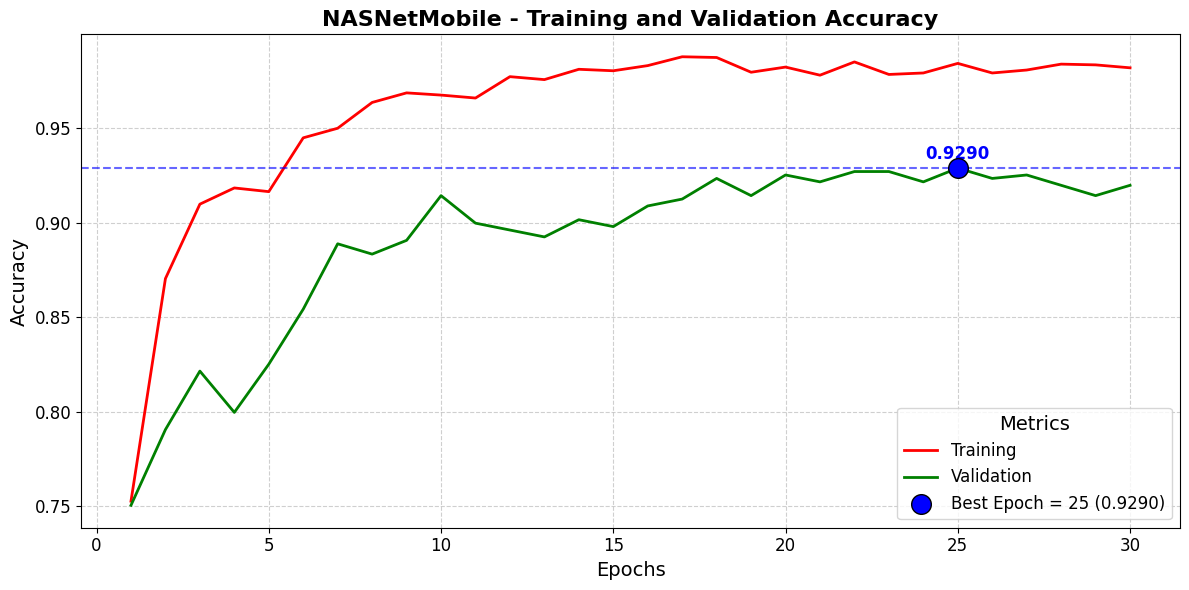

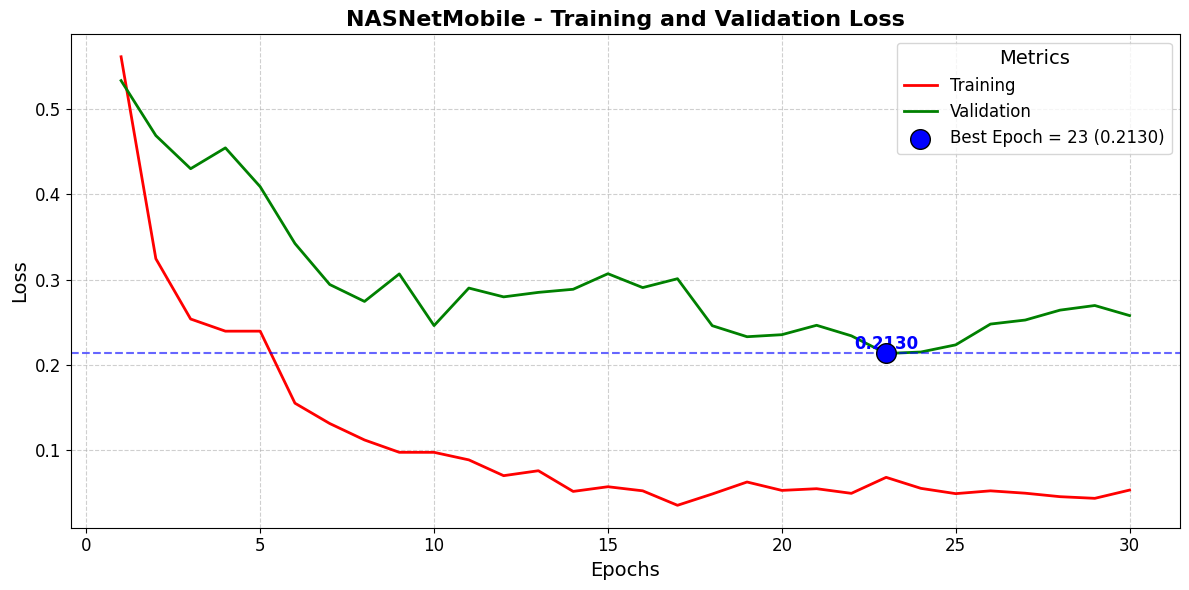

35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 895ms/step

Results for model: NASNetMobile
Accuracy: 0.9036 | Precision: 0.9135 | Recall: 0.9025 | F1: 0.9029


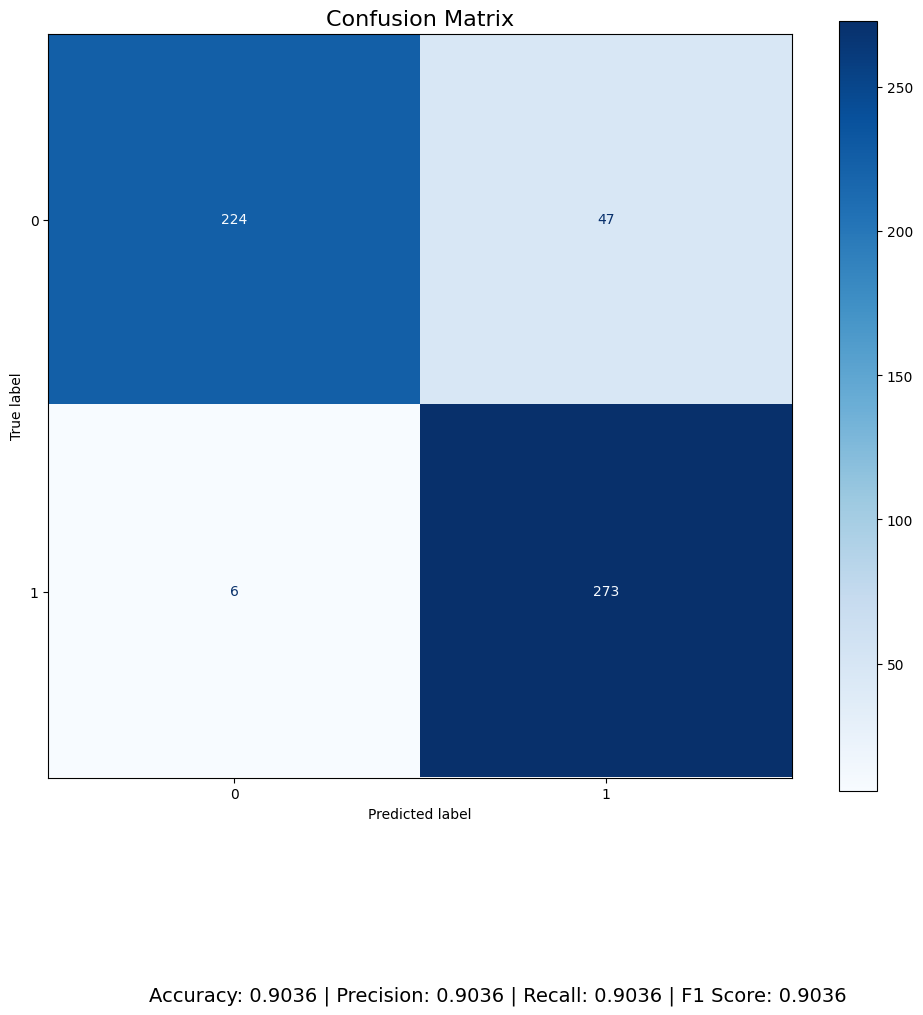

Sensitivity (Recall): 0.9785
Specificity        : 0.8266
False Positive Rate: 0.1734
False Negative Rate: 0.0215
Likelihood Ratio + : 5.6420
Likelihood Ratio - : 0.0260
✅ Model saved to /content/drive/MyDrive/DiabeticProject/saved_models/NASNetMobile_single_split.keras (Accuracy: 0.9036)
Training log saved to: /content/drive/MyDrive/DiabeticProject/training_logs/NASNetMobile_training_log.csv
--------------------------------------------------


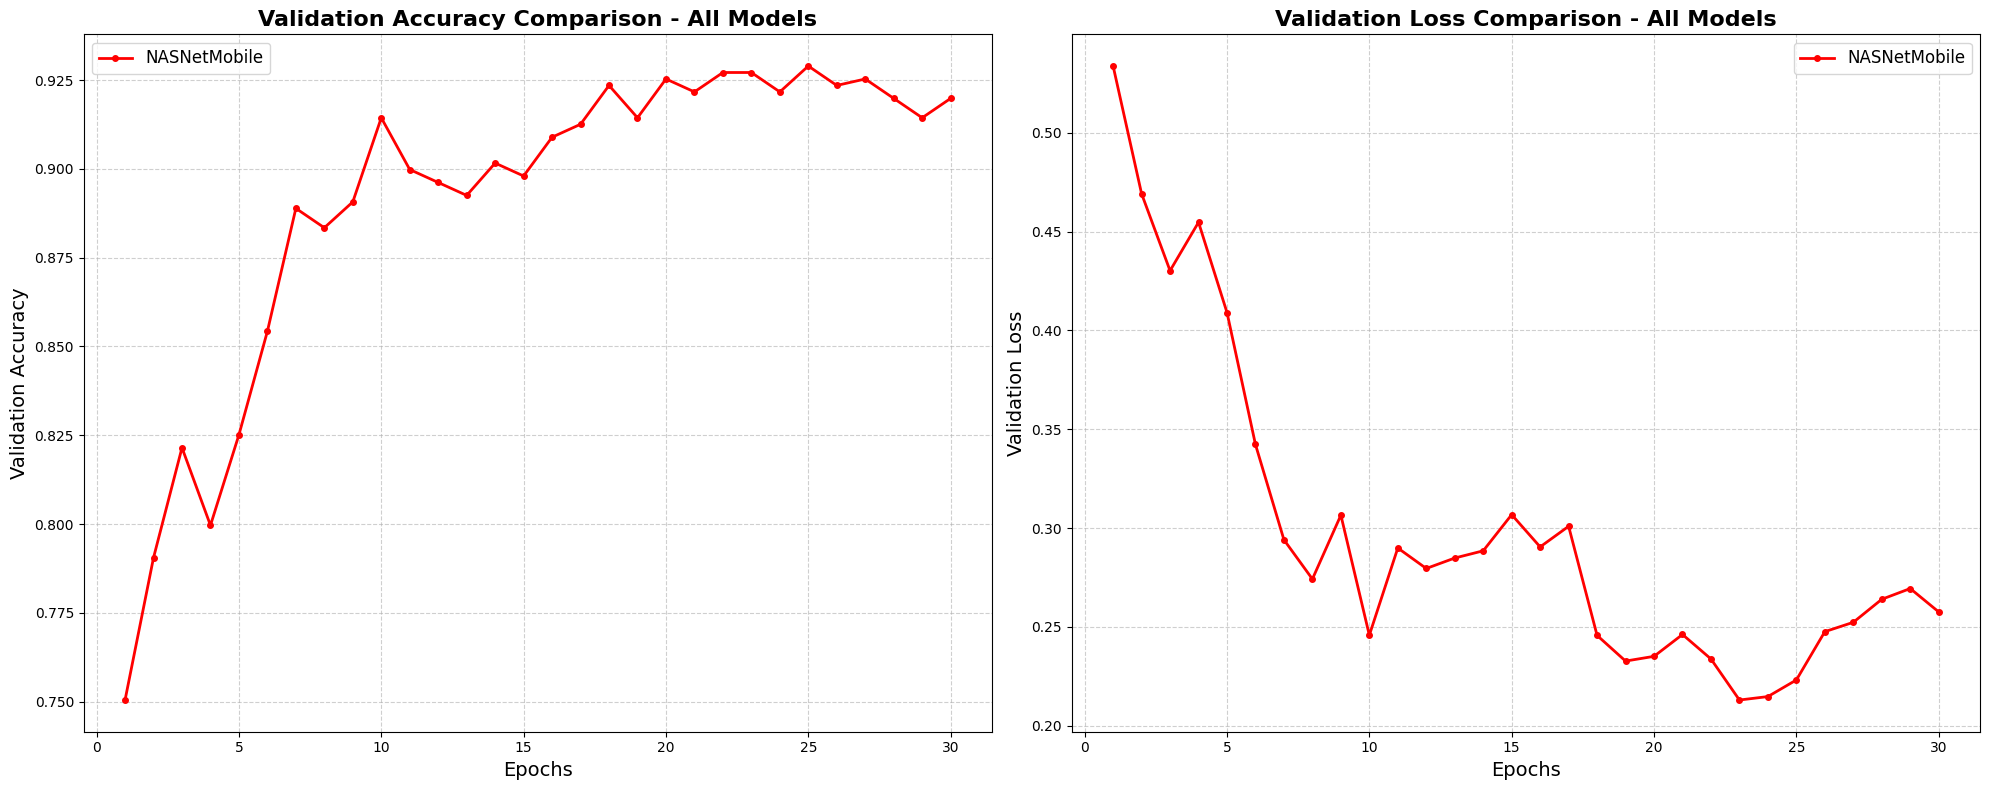


All CSV files saved to: /content/drive/MyDrive/DiabeticProject/training_logs
Master training log: /content/drive/MyDrive/DiabeticProject/training_logs/all_models_training_log.csv
Final test results: /content/drive/MyDrive/DiabeticProject/training_logs/final_test_results.csv


In [ ]:
import csv
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

models_to_evaluate = [
    #tf.keras.applications.MobileNetV2,  # Best for mobile/edge (lightweight, strong performance)
    #tf.keras.applications.EfficientNetB0,  # State-of-the-art accuracy-to-size ratio
    #tf.keras.applications.Xception,  # High accuracy with depthwise separable convolutions
    #tf.keras.applications.MobileNetV3Small,  # Improved over V2 with NAS optimization
    #tf.keras.applications.EfficientNetV2B0,  # Faster training + better efficiency than B0
    #tf.keras.applications.VGG16, # A widely used standard CNN architecture
    #tf.keras.applications.ResNet50, # Popular for its residual connections
    #tf.keras.applications.DenseNet121 # Known for its dense connections
    tf.keras.applications.NASNetMobile
]

# Run training with single split (no K-fold)
automated_model_training_with_csv_logging(train_df, valid_df, test_df, img_size, batch_size, img_shape, models_to_evaluate, epoch_size, y)

In [ ]:
import os

# List files in /tmp/training_logs
log_dir = '/tmp/training_logs'
for f in os.listdir(log_dir):
    print(f)

!mkdir -p training_logs
!cp -r /tmp/training_logs/* training_logs/


In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image
import os

# Method 1: Check if model file exists and get correct path
def find_model_file():
    base_dir = '/content/drive/MyDrive/Diabetic/saved_models'
    if not os.path.exists(base_dir):
        print("❌ Base model directory not found.")
        return None

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(('.keras', '.h5')):
                full_path = os.path.join(root, file)
                print(f"✅ Found model: {full_path}")
                return full_path

    print("❌ No model files found.")
    return None

    # Check all possible model files (both .keras and .h5)
    model_patterns = [
        'EfficientNetV2B0_single_split.keras',
        'EfficientNetV2B0_single_split.h5',
        'MobileNetV2_single_split.keras',
        'MobileNetV2_single_split.h5',
        'EfficientNetB0_single_split.keras',
        'EfficientNetB0_single_split.h5',
        'Xception_single_split.keras',
        'Xception_single_split.h5',
        'VGG16_single_split.keras',
        'VGG16_single_split.h5',
        'ResNet50_single_split.keras',
        'ResNet50_single_split.h5',
        'DenseNet121_single_split.keras',
        'DenseNet121_single_split.h5'
    ]

    # Search in all directories
    for directory in save_directories:
        if os.path.exists(directory):
            print(f"Checking directory: {directory}")

            # Look for specific model patterns first
            for pattern in model_patterns:
                full_path = os.path.join(directory, pattern)
                if os.path.exists(full_path):
                    print(f"✅ Found model: {full_path}")
                    return full_path

            # Look for any .keras or .h5 files
            model_files = [f for f in os.listdir(directory)
                          if f.endswith(('.keras', '.h5'))]
            if model_files:
                print(f"Found model files in {directory}: {model_files}")
                # Prefer .keras files over .h5
                keras_files = [f for f in model_files if f.endswith('.keras')]
                if keras_files:
                    selected_file = os.path.join(directory, keras_files[0])
                else:
                    selected_file = os.path.join(directory, model_files[0])
                print(f"✅ Selected: {selected_file}")
                return selected_file

    print("❌ No model files found in any location")
    return None

# Method 2: Upload model file if not found
def upload_model():
    """Upload model file from local machine"""
    print("Please upload your trained model file (.h5):")
    uploaded = files.upload()
    if uploaded:
        model_filename = list(uploaded.keys())[0]
        return f'/content/{model_filename}'
    return None

# Try to find existing model or upload one
model_path = find_model_file()

if model_path is None:
    print("Model file not found. Please upload your model:")
    model_path = upload_model()

if model_path is None:
    print("No model file provided. Please upload a trained model file.")
    exit()

try:
    # Load the trained model
    print(f"Loading model from: {model_path}")
    loaded_model = load_model(model_path)
    print("Model loaded successfully!")

    # Print model summary
    print("\nModel Summary:")
    loaded_model.summary()

except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Define image size (adjust based on your model's input size)
# Based on your training script, you used (256, 256)
img_size = (256, 256)  # This matches your training data size

# Upload and preprocess the image
print("\nPlease upload an image for prediction:")
uploaded = files.upload()

for fn in uploaded.keys():
    try:
        print(f"\nProcessing image: {fn}")

        # Load and preprocess image
        img_bytes = uploaded[fn]
        img = Image.open(io.BytesIO(img_bytes))

        # Convert to RGB if needed (in case of grayscale or RGBA)
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize image
        img = img.resize(img_size)

        # Convert to array and preprocess
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Rescale the image

        print(f"Image shape after preprocessing: {img_array.shape}")

        # Make prediction
        predictions = loaded_model.predict(img_array)
        print(f"Raw predictions: {predictions}")

        # Interpret the prediction
        # Based on your training script using categorical crossentropy with 2 classes
        if len(predictions[0]) == 2:
            # Your model outputs [No DR probability, DR probability]
            predicted_class = np.argmax(predictions[0])
            confidence = np.max(predictions[0])

            if predicted_class == 0:
                prediction_label = 'No DR'
            else:
                prediction_label = 'DR'

        elif len(predictions[0]) == 1:
            # Single output (sigmoid) - less likely based on your code
            confidence = predictions[0][0]
            prediction_label = 'DR' if confidence > 0.5 else 'No DR'
        else:
            # Multi-class classification
            predicted_class = np.argmax(predictions[0])
            confidence = predictions[0][predicted_class]
            # Define your class labels here based on original APTOS dataset
            class_labels = ['No DR', 'Mild DR', 'Moderate DR', 'Severe DR', 'Proliferative DR']
            if predicted_class < len(class_labels):
                prediction_label = class_labels[predicted_class]
            else:
                prediction_label = f'Class {predicted_class}'

        print(f"The image '{fn}' is classified as: {prediction_label}")
        print(f"Confidence: {confidence:.4f}")

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(f"Prediction: {prediction_label} (Confidence: {confidence:.2f})")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error processing image {fn}: {e}")
        continue

print("\nPrediction complete!")